# Stock Market Analysis and Forecasting

Stocks we will analyse:
1. **Amazon** (AMZN)
2. **Google** (GOOG)
3. **Microsoft** (MSFT)
4. **Nvidia** (NVDA)

We use `yfinance` to get stock information, and visualize different aspects of it using `seaborn` and `matplotlib`. We will predict future stock prices using various models and comparing those like **AR, MA, ARIMA** and **RNNs (LSTM)**.

We will analyse the stocks on following ways:

1. Change in price of the stock over time
2. Average daily return of the stock
3. Moving average of various stocks
4. Correlation between different stocks
5. Risk of a stock

We attempt to predict future stock behavior - Predicting the closing price stock price of Google inc using various models and comparing them.

# 1. Change in price of the stock over time

In [2]:
!pip install -q yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [4]:
companies_map = {
    "Amazon": "AMZN",
    "Google": "GOOG",
    "Microsoft": "MSFT",
    "Nvidia": "NVDA",
}

# set up end and start times for data
end = datetime(2025, 3, 1) # 01-03-2025
start = datetime(2003, 3, 1) # 01-03-2003

companies_df_map = {}

for name, stock_ticker in companies_map.items():
    companies_df_map[name] = yf.download(stock_ticker, start, end, multi_level_index=False)
    companies_df_map[name]["Company"] = name

# we get already adjusted stock data
df = pd.concat([company_data for company_data in companies_df_map.values()], axis=0)
df.sample(10)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,Company
Date,,,,,,
2022-02-10,294.146210,300.702670,292.511963,295.761012,45386200,Microsoft
2016-04-21,37.778065,37.843254,37.300825,37.590951,61210000,Google
2020-08-13,11.406196,11.684050,11.319227,11.508864,374460000,Nvidia
2018-04-27,5.600054,5.698283,5.557744,5.678489,400848000,Nvidia
2022-04-27,138.167007,141.948502,135.783493,140.191498,71336000,Amazon
2007-11-01,4.382500,4.479000,4.325000,4.387500,165314000,Amazon
2024-09-25,123.490135,124.919905,121.590439,122.000369,284692900,Nvidia
2006-01-06,0.312086,0.313232,0.298408,0.310558,623388000,Nvidia
2013-06-06,13.391500,13.525000,13.210500,13.387500,49526000,Amazon


**Note:** Close, High, Low, Open are in *USD($)*

In [5]:
shapes = [ele.shape for ele in companies_df_map.values()]
for shape, company in zip(shapes, companies_df_map.keys()):
    print(f"{company} -> {shape}")

Amazon -> (5536, 6)
Google -> (5166, 6)
Microsoft -> (5536, 6)
Nvidia -> (5536, 6)


```python
# Google had it's IPO in 2004, while other companies were present in 2003
# weekends are missing from the records for all companies
print(companies_df_map["Google"].index.min())
>>> 2004-08-19 00:00:00
```

## Descriptive Statistics

In [76]:
# Summary Stats
companies_df_map["Google"].describe()

,Close,High,Low,Open,Volume
count,5166.000000,5166.000000,5166.000000,5166.000000,5.166000e+03
mean,48.766469,49.262207,48.258492,48.747351,1.130060e+08
std,47.843735,48.345653,47.343925,47.818328,1.485437e+08
min,2.479170,2.522056,2.378775,2.458844,1.584340e+05
25%,13.090262,13.225612,12.966689,13.096833,2.657822e+07
50%,27.699238,27.867880,27.470930,27.711554,5.183557e+07
75%,64.648428,65.175423,64.325455,64.631877,1.381760e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [77]:
# Summary Stats
companies_df_map["Microsoft"].describe()

,Close,High,Low,Open,Volume
count,5536.000000,5536.000000,5536.000000,5536.000000,5.536000e+03
mean,96.991701,97.890556,96.012477,96.971340,4.585445e+07
std,118.433784,119.489593,117.268116,118.422433,2.850266e+07
min,11.198261,11.545670,10.991300,11.235219,7.164500e+06
25%,19.677458,19.858102,19.473254,19.628511,2.562092e+07
50%,31.934771,32.195291,31.706619,31.878300,3.935925e+07
75%,130.704426,131.862960,129.688276,130.959822,5.852368e+07
max,464.854340,465.639777,461.772294,464.297590,5.910522e+08


Per year we would have less than 365 data points because weekends are not included in the data. Also, Google was publicly listed in 2004, so it has lesser points than others.

## Information about the data

In [78]:
# general info
companies_df_map["Google"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5166 entries, 2004-08-19 to 2025-02-28
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Close    5166 non-null   float64
 1   High     5166 non-null   float64
 2   Low      5166 non-null   float64
 3   Open     5166 non-null   float64
 4   Volume   5166 non-null   int64  
 5   Company  5166 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 282.5+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

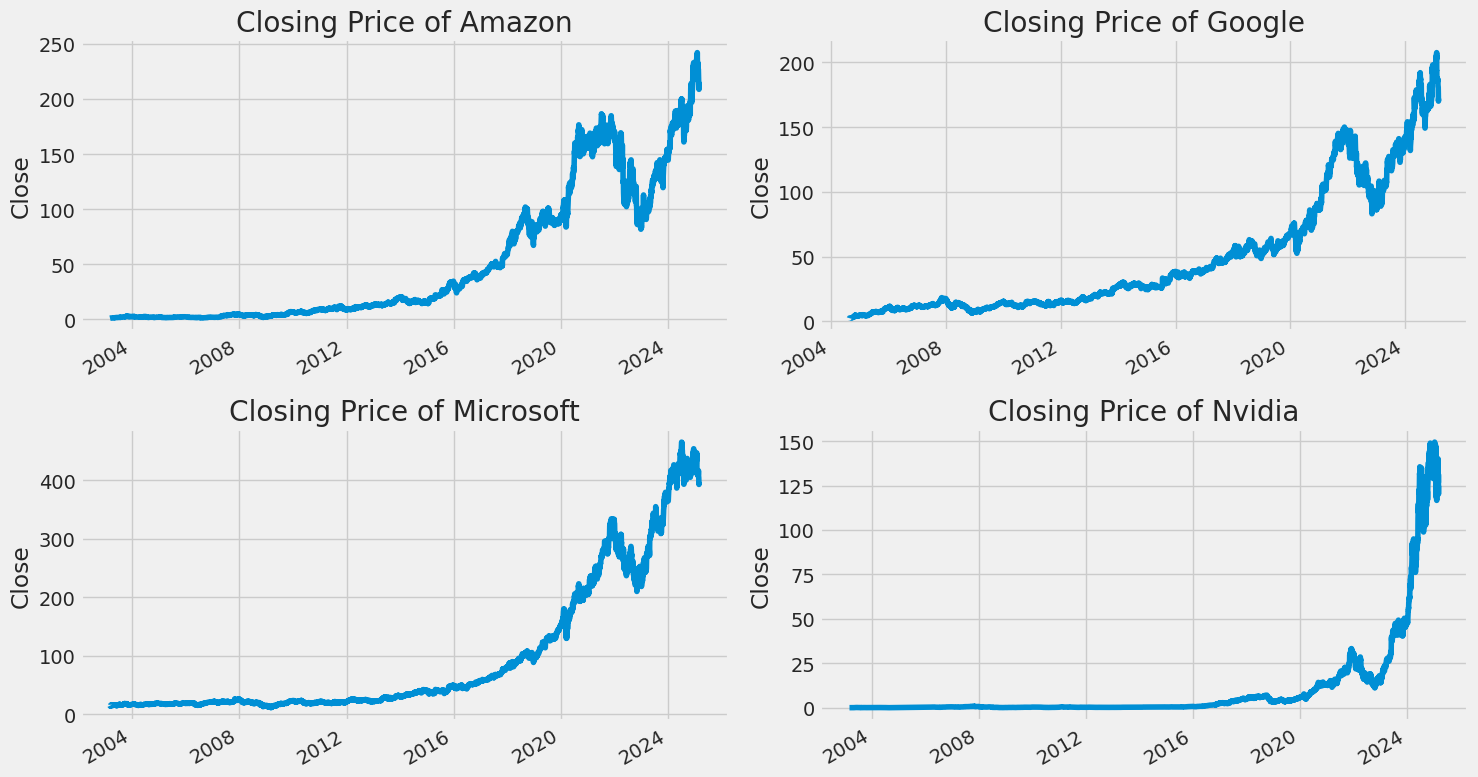

In [79]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies_df_map.values()):
    ax = plt.subplot(2, 2, i+1)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel('')
    plt.title(f"Closing Price of {list(companies_df_map.keys())[i]}")

plt.tight_layout()

## Volume of Sales
Trading volume measures the number of shares or contracts traded within a specific time frame, typically daily. It indicates market liquidity and investor interest. Market liquidity refers to how easily an asset or security can be bought or sold without significantly affecting its price. A market is considered liquid if there are many buyers and sellers actively trading, allowing transactions to occur smoothly

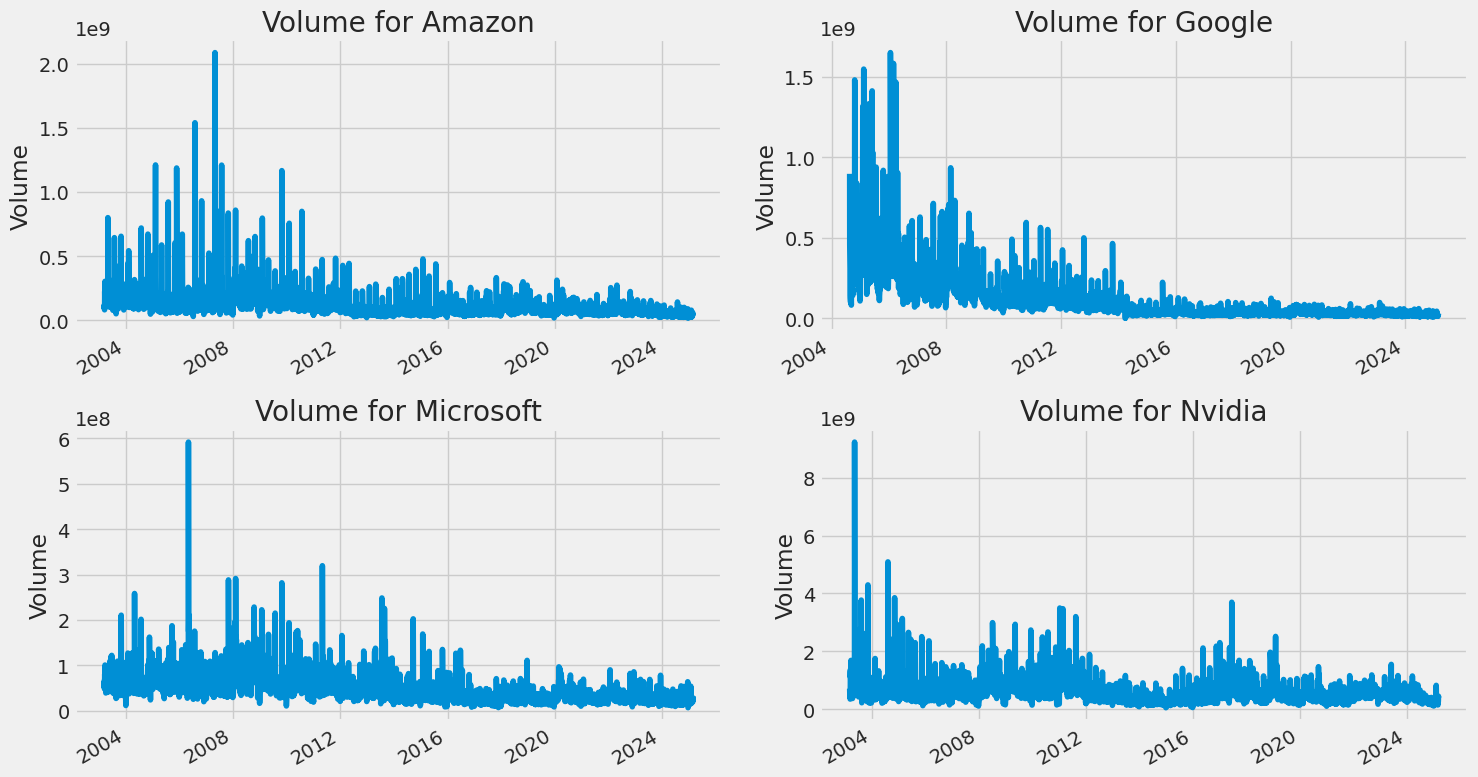

In [80]:
# plot the total volume of stock being traded each day
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies_df_map.values()):
    ax = plt.subplot(2, 2, i+1)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel('')
    plt.title(f"Volume for {list(companies_df_map.keys())[i]}")

plt.tight_layout()

# 2. Average daily return of the stock

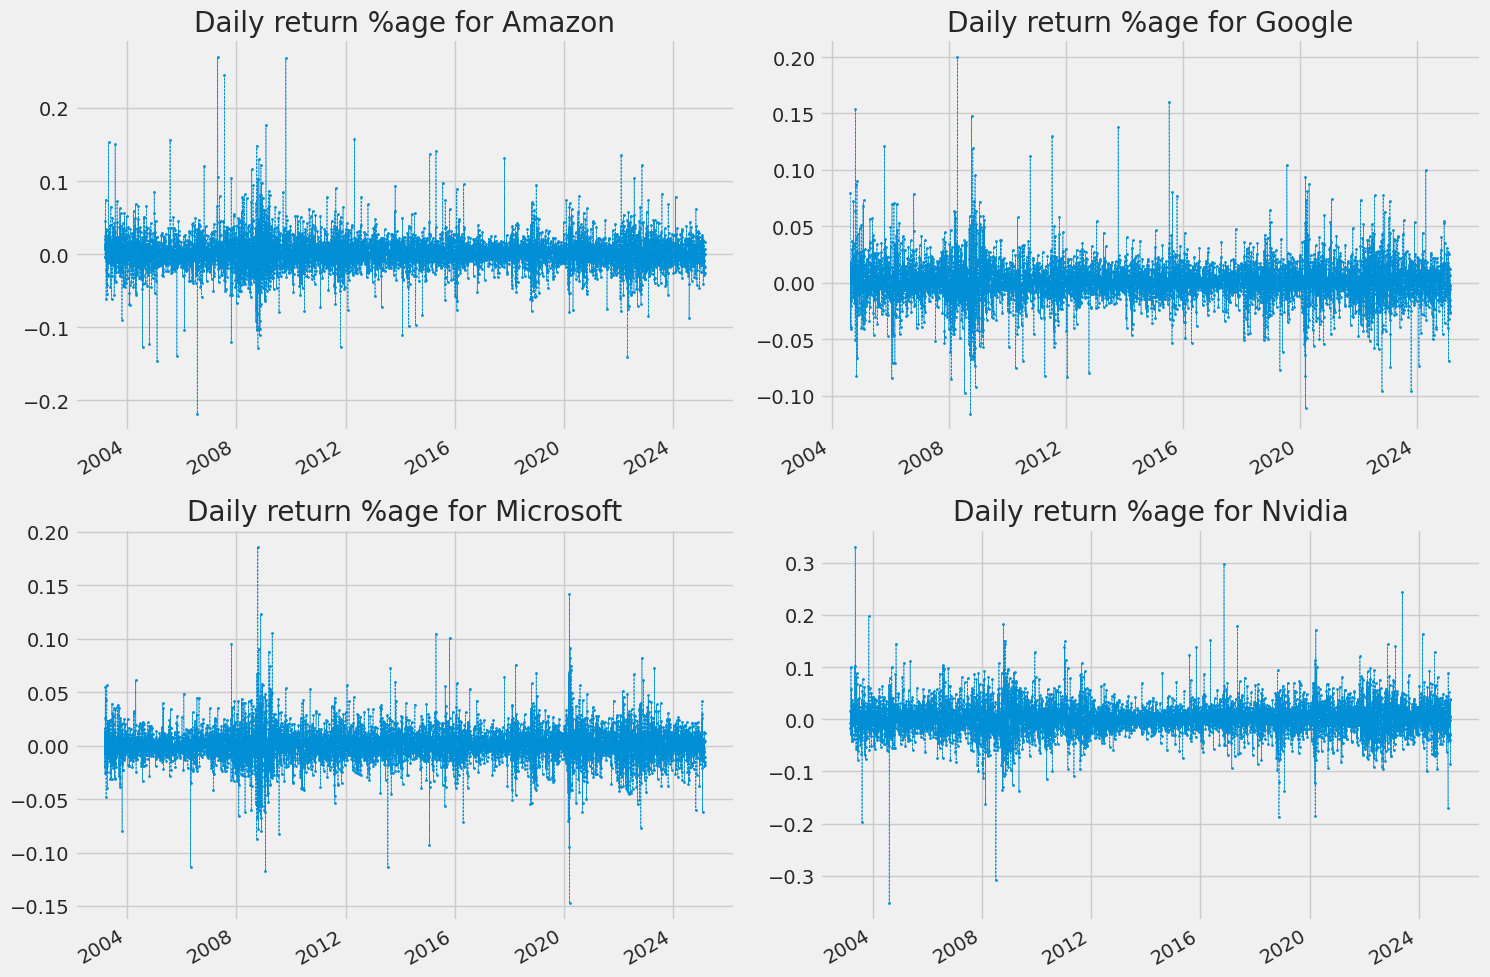

In [81]:
# use `.pct_change()` to find the percent change for each day
for company in companies_df_map.values():
    company['Daily Return'] = company['Close'].pct_change()

# plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for (name, data), ax in zip(companies_df_map.items(), axes.flatten()):
    data['Daily Return'].plot(ax=ax, linewidth=0.5, linestyle='--', marker='o', markersize=1)
    ax.set_title(f"Daily return %age for {name}")
    ax.set_xlabel("")


fig.tight_layout()

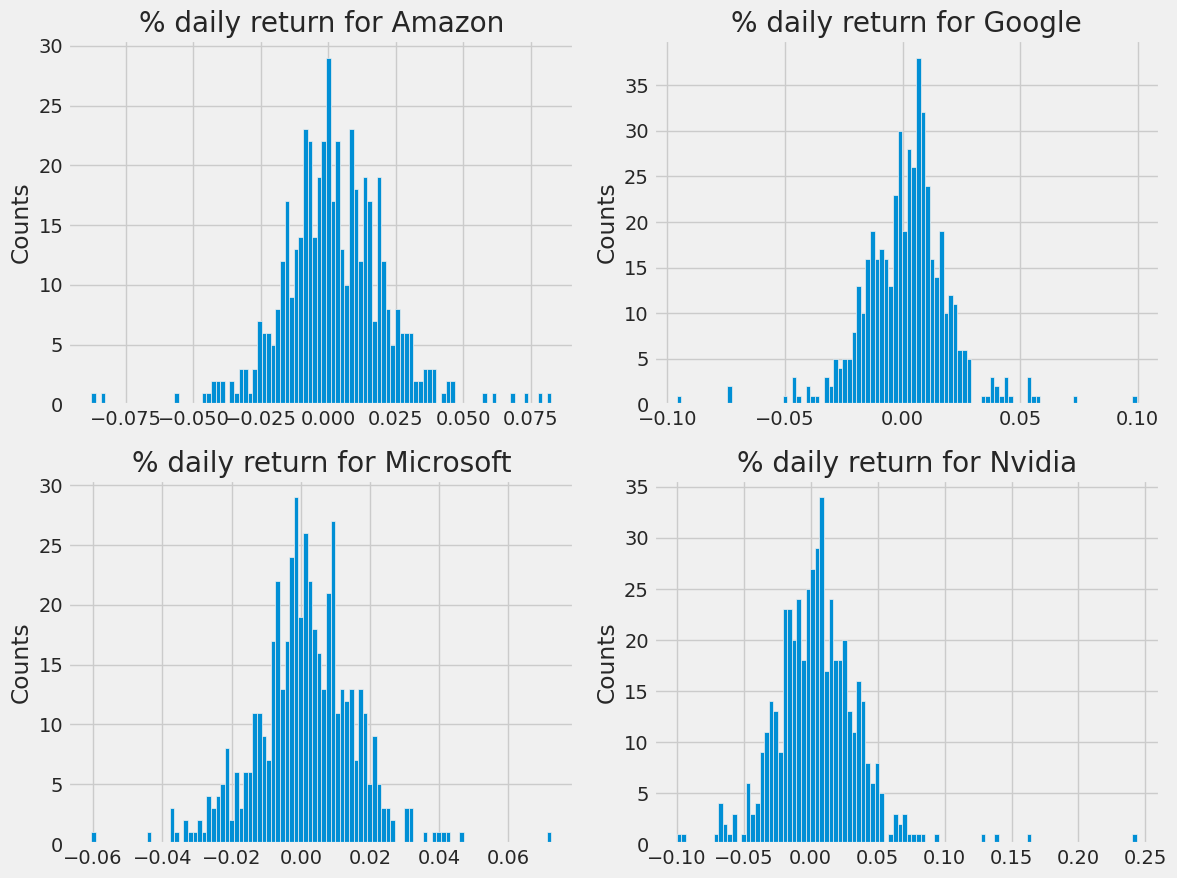

In [82]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(companies_df_map.values()):
    plt.subplot(2, 2, i+1)
    # let us see the returns for a span of one-two years
    reduced_df = company.loc["2023-01-01":"2024-12-31", 'Daily Return']
    reduced_df.hist(bins=100)
    plt.xlabel('')
    plt.ylabel('Counts')
    plt.title(f'% daily return for {list(companies_map.keys())[i]}')

plt.tight_layout()

In [83]:
print("Average daily return from 2003 to 2025\n")
for name, company in companies_df_map.items():
    print(name, " -> ", company['Daily Return'].mean(), "%")

Average daily return from 2003 to 2025

Amazon  ->  0.0012421286415636704 %
Google  ->  0.0010050936176588155 %
Microsoft  ->  0.0007399265594862467 %
Nvidia  ->  0.0017988703537998303 %


# 3. Moving average of various stocks

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

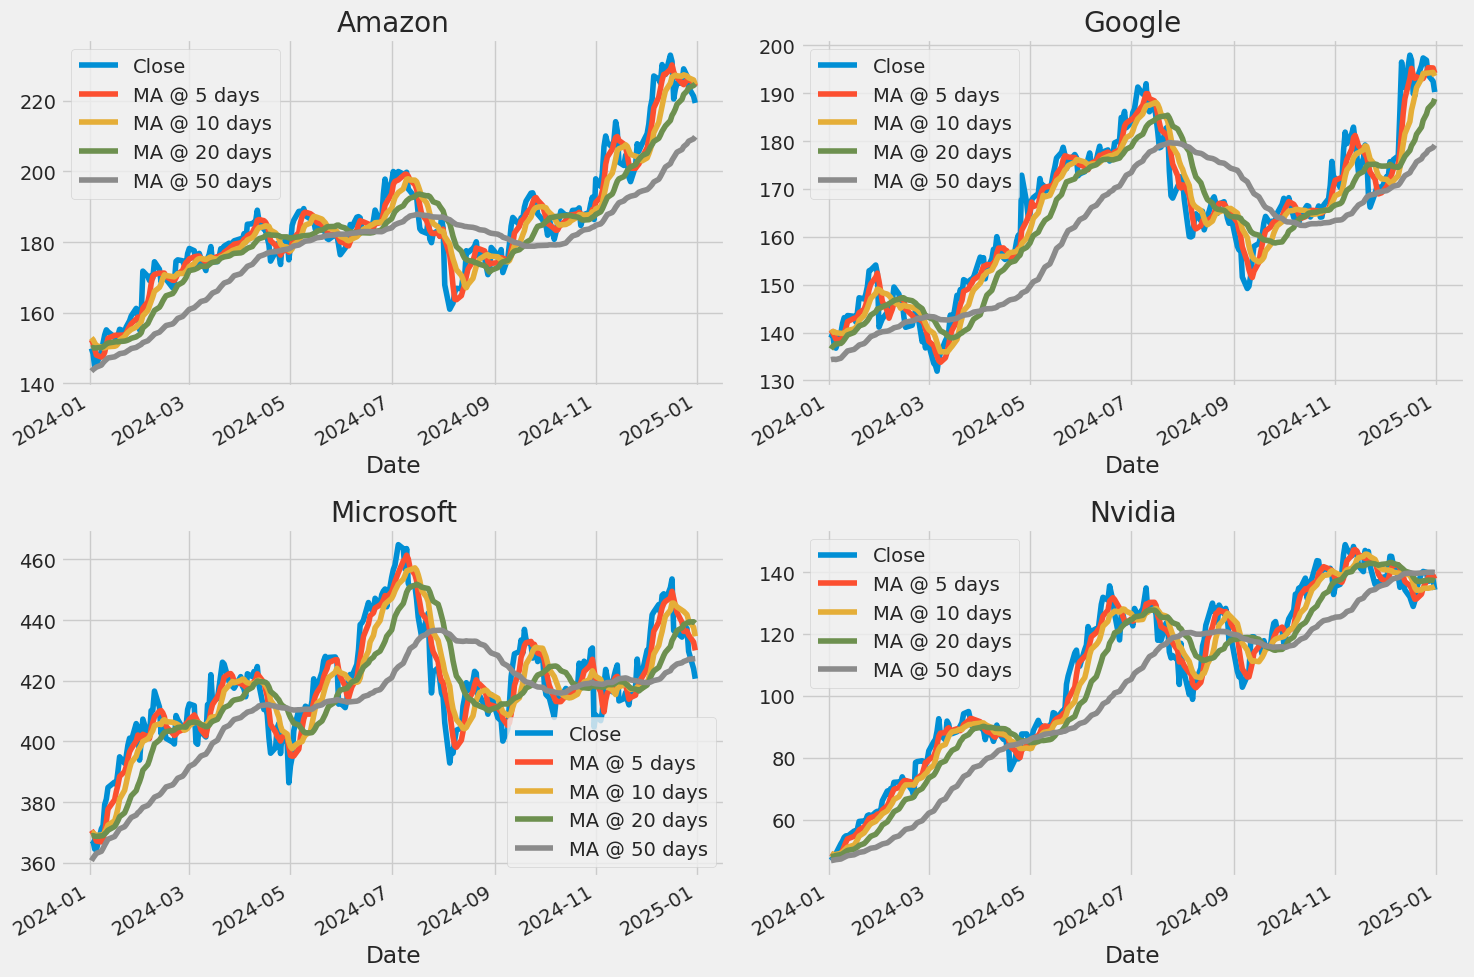

In [84]:
ma_day = [5, 10, 20, 50]

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for ma in ma_day:
    for company in companies_df_map.values():
        column_name = f"MA @ {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

for ax, (name, data) in zip(axes.flatten(), companies_df_map.items()):
    cols = ['Close']
    for ma in ma_day:
        column_name = f"MA @ {ma} days"
        cols.append(column_name)
    data.loc["2024-01-01":"2025-01-01", cols].plot(ax=ax)
    ax.set_title(name)

fig.tight_layout()

MA @ 5, 10, 20 days are good but, **MA @ 10** days being the sweet-spot!

# 4. Correlation between different stocks

Since Google was listed later as compared to other, we will have to take a common time frame for all stocks to calculate the correlations.

In [115]:
# get all the closing prices for the stocks
close_df_list = []
returns_df_list = []
for name, data in companies_df_map.items():
    col_name1 = f"{name}_Close"
    col_name2 = f"{name}_Daily Return"
    curr_df = data.loc["2005-01-01":, ['Close', 'Daily Return']]
    curr_df = curr_df.rename(columns={'Close':col_name1, 'Daily Return':col_name2})
    close_df_list.append(curr_df[[col_name1]])
    returns_df_list.append(curr_df[[col_name2]])

In [118]:
returns_df = pd.concat(returns_df_list, axis=1)
close_df = pd.concat(close_df_list, axis=1)

A stock compared to itself would give a perfectly linear line. Let us check how two different stocks correlate to each other.

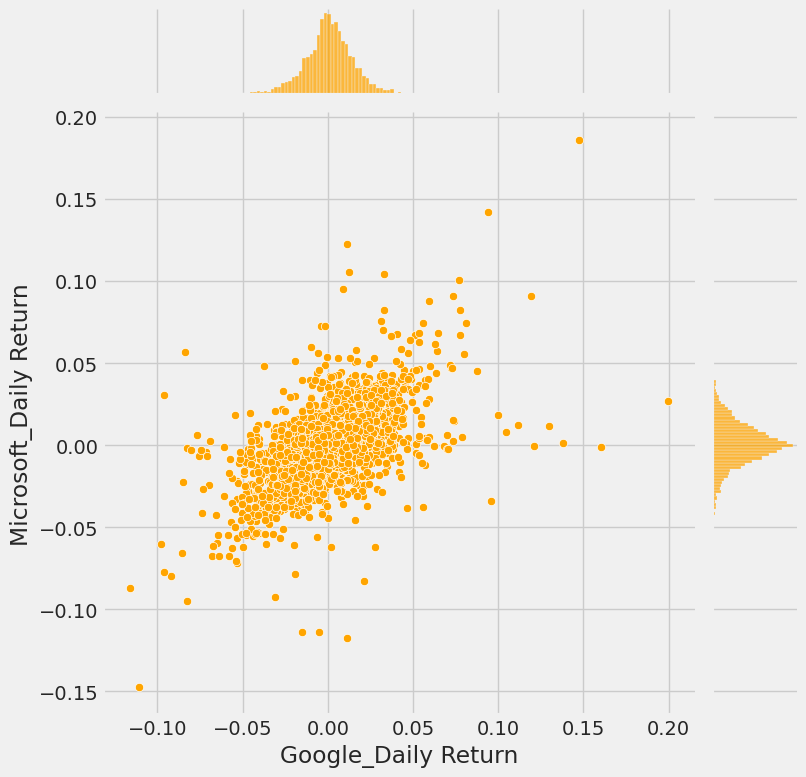

In [119]:
# use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='Google_Daily Return', y='Microsoft_Daily Return', data=returns_df, kind='scatter', height=8, ratio=6, color='orange')

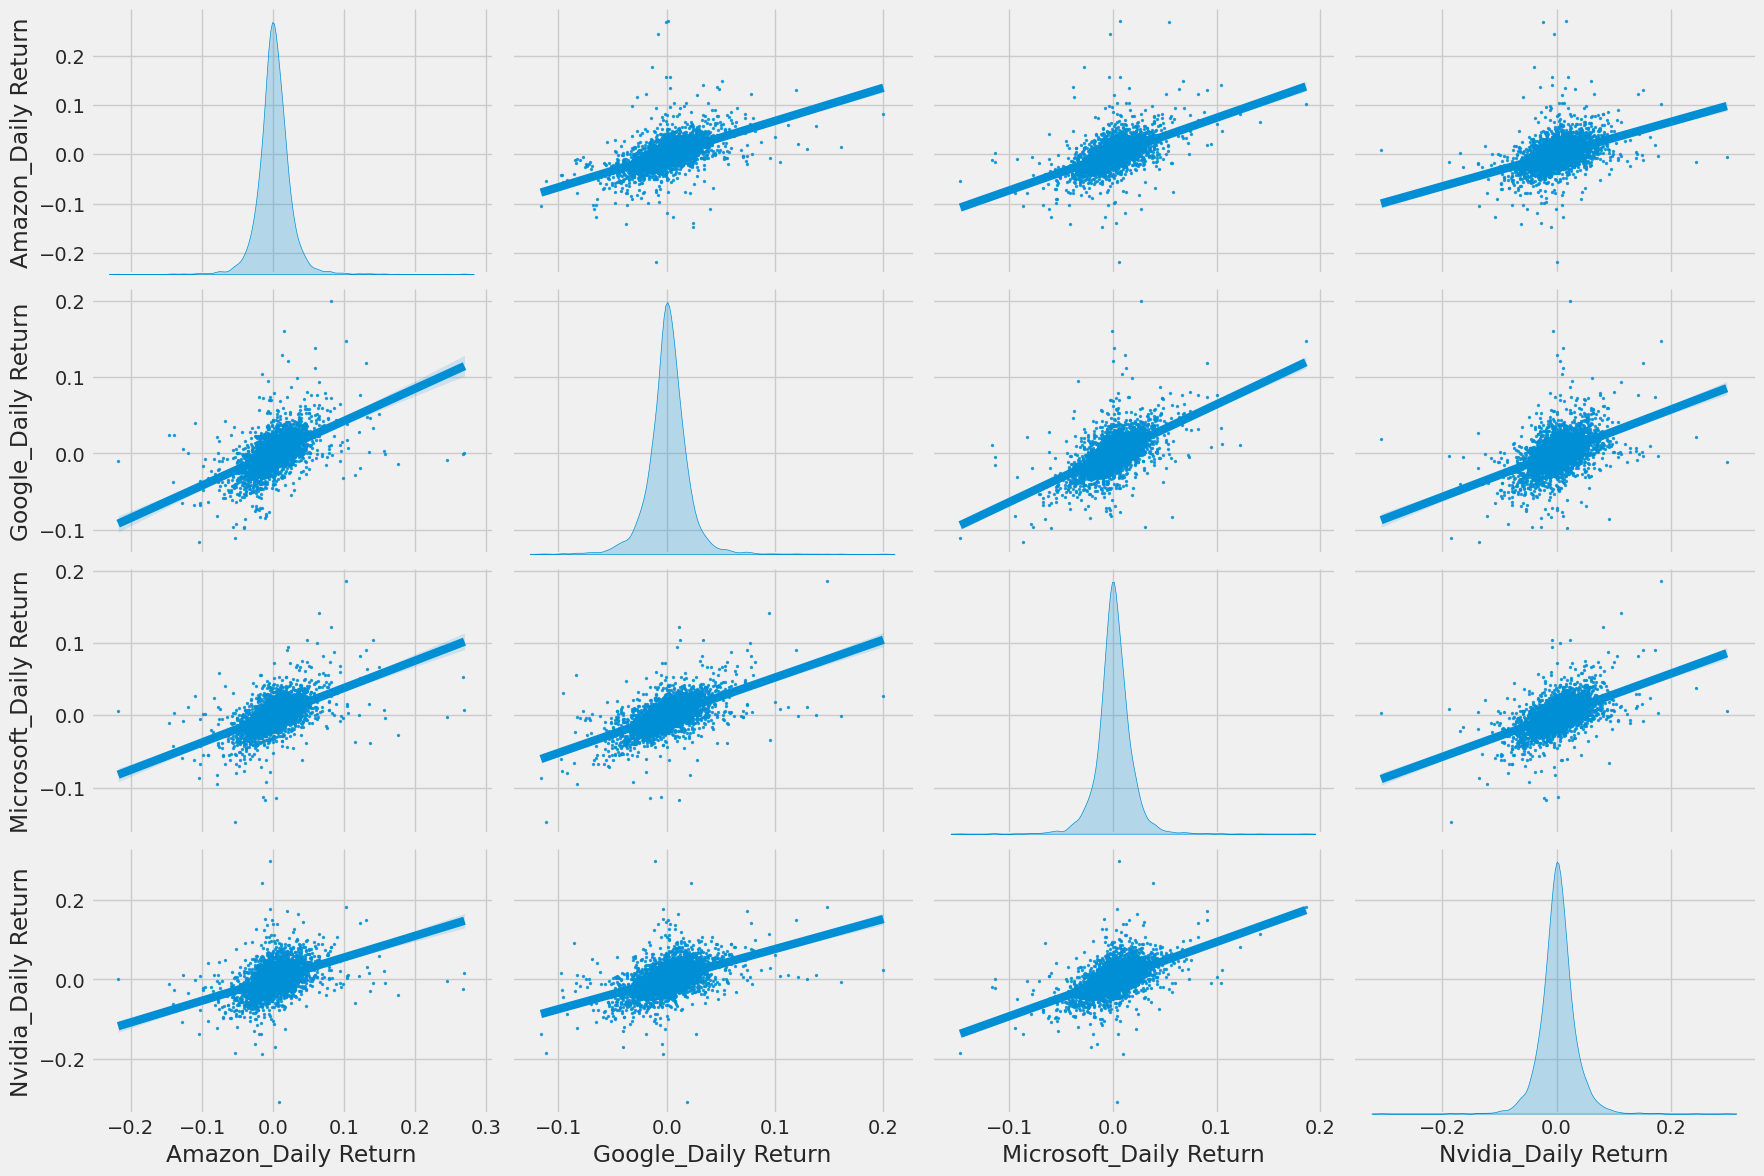

In [123]:
sns.pairplot(returns_df, kind="reg", diag_kind="kde", plot_kws={"scatter_kws": {"s": 2}}, height=3, aspect=1.5)

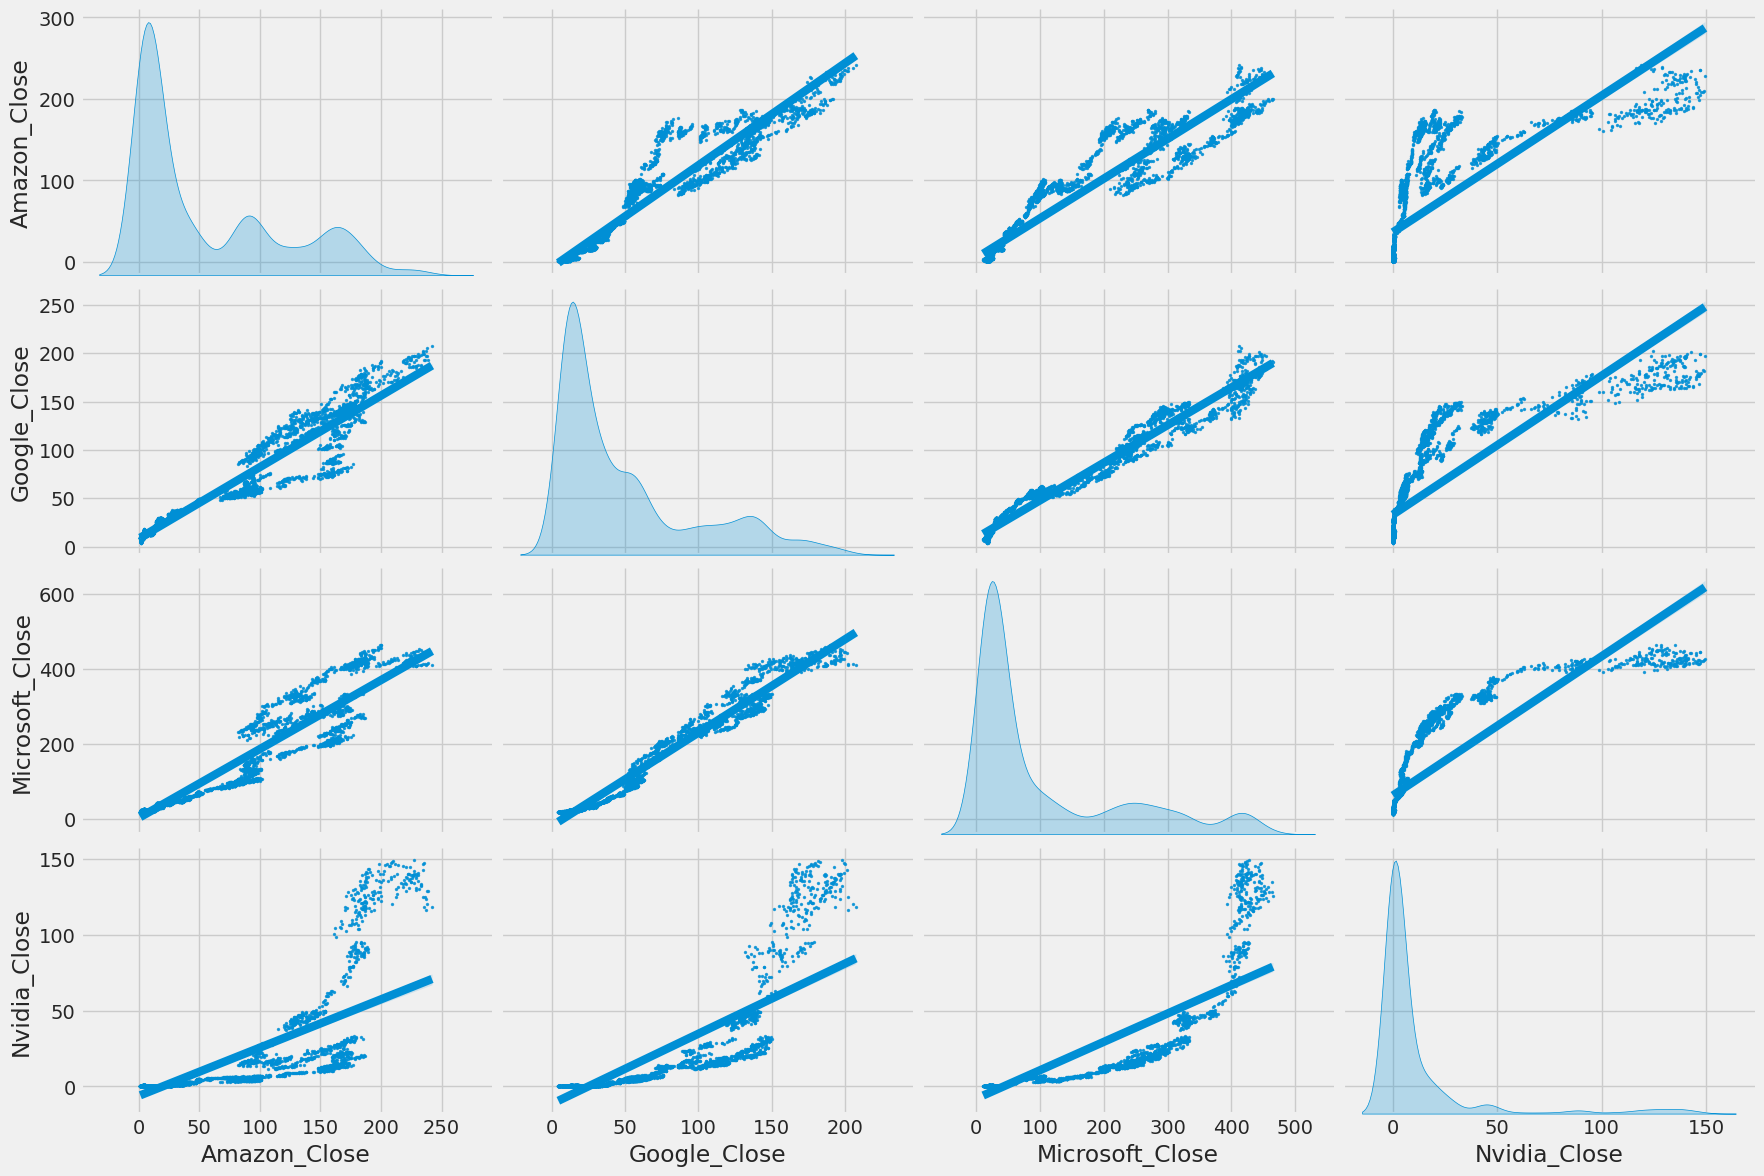

In [124]:
sns.pairplot(close_df, kind="reg", diag_kind="kde", plot_kws={"scatter_kws": {"s": 2}}, height=3, aspect=1.5)

We see an interesting correlation between **Google-Amazon** and **Google-Microsoft** daily returns. It might be interesting to investigate that individual comaprison.

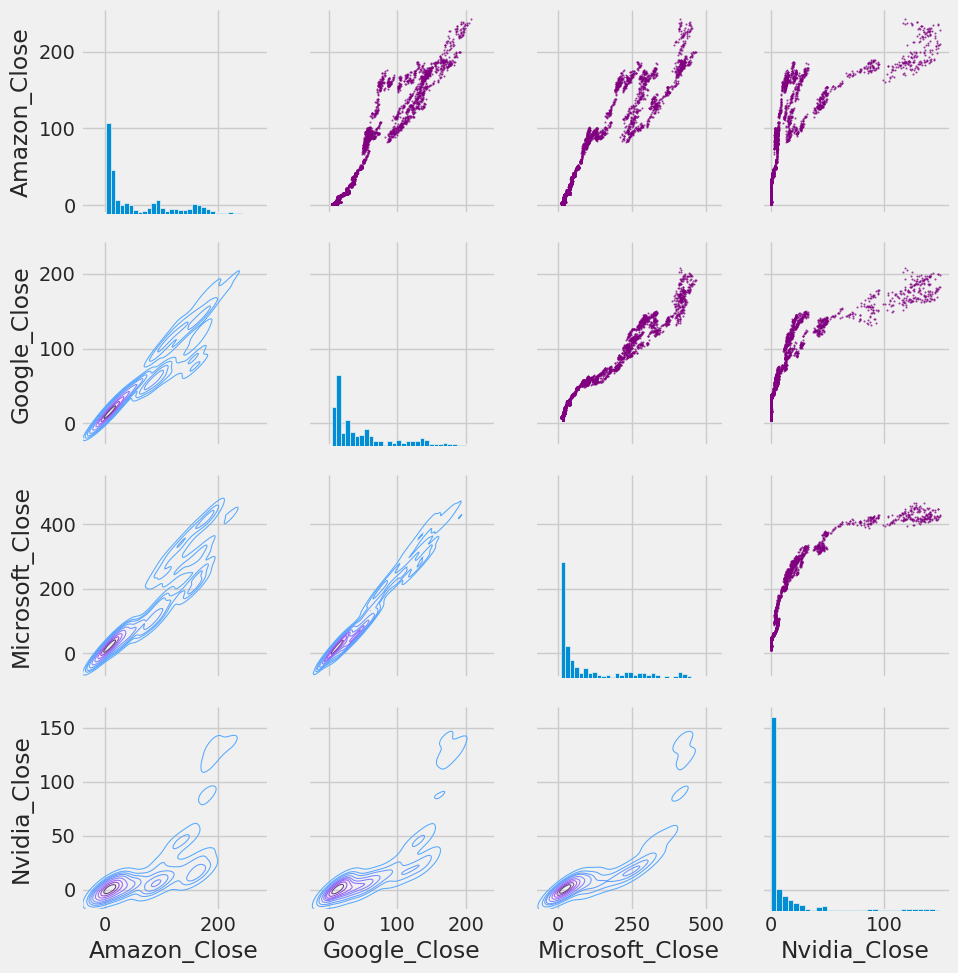

In [125]:
close_fig = sns.PairGrid(close_df)
close_fig.map_upper(plt.scatter, color='purple', s=1, alpha=0.6)
close_fig.map_lower(sns.kdeplot, cmap='cool_d', linewidths=0.75)
close_fig.map_diag(plt.hist, bins=30)

<Figure size 1200x1200 with 0 Axes>

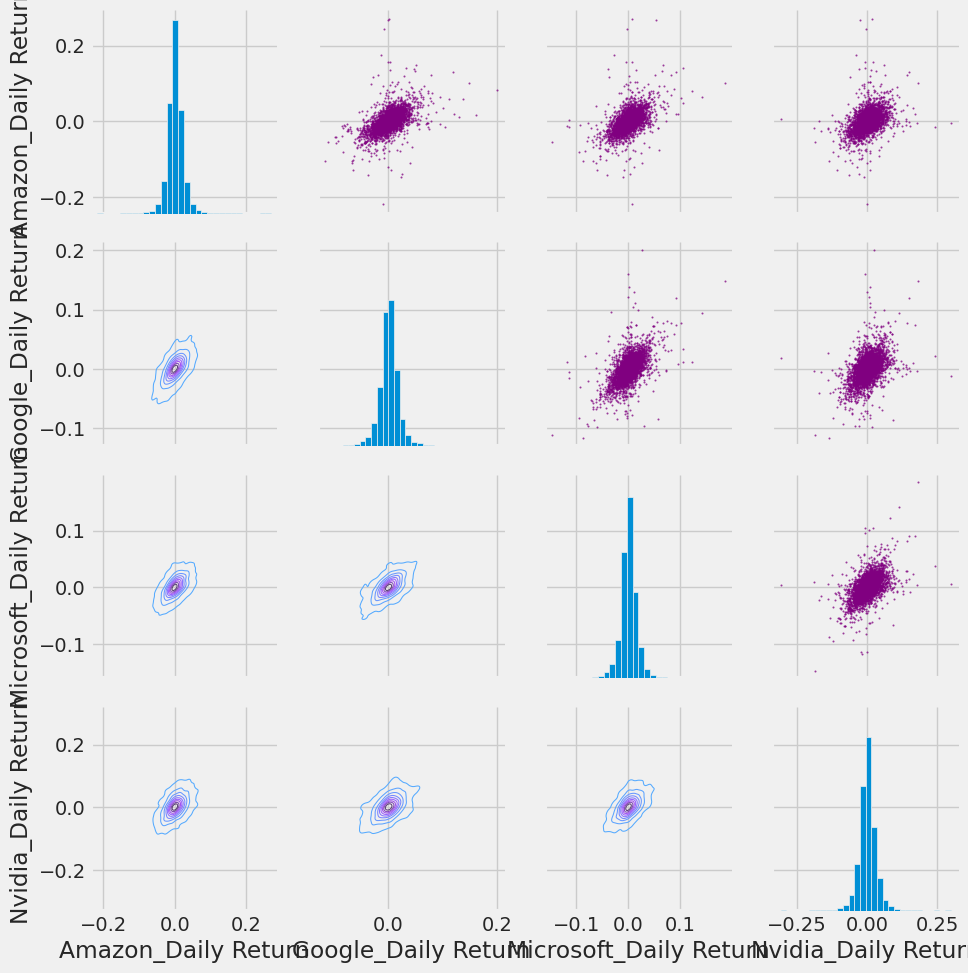

In [128]:
plt.figure(figsize=(12, 12))
returns_fig = sns.PairGrid(returns_df)
returns_fig.map_upper(plt.scatter, color='purple', s=1, alpha=0.6)
returns_fig.map_lower(sns.kdeplot, cmap='cool_d', linewidths=0.75)
returns_fig.map_diag(plt.hist, bins=30)
plt.show()

Text(0.5, 1.0, 'Correlation of stock closing price')

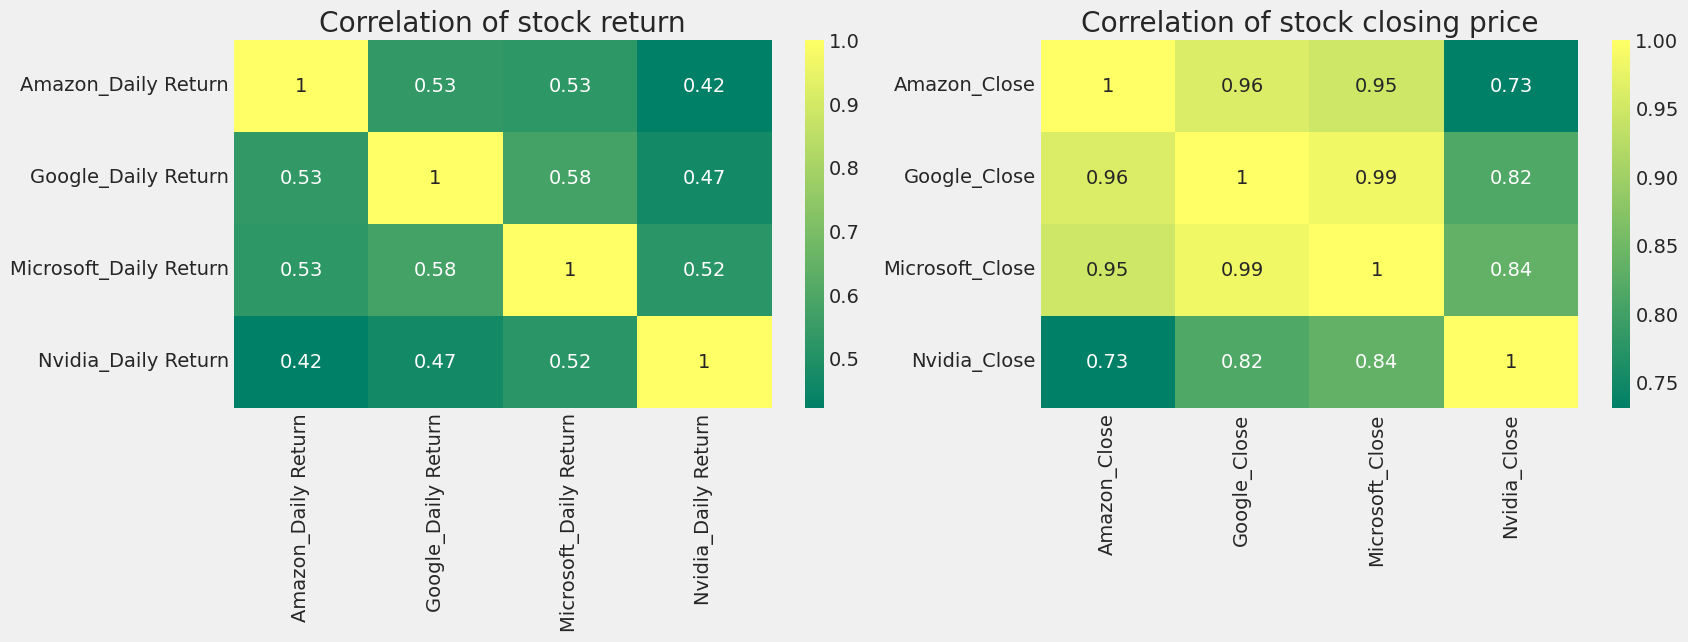

In [130]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 2, 1)
sns.heatmap(returns_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(close_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Microsoft and Nvidia share good correlations due to the fact that Microsoft had invested in OpenAI which uses Nvidia GPUs for training their models. Also Xbox also uses Nvidia GeForce GPUs for gaming.

***
### Returns
+ Three stocks (Google, Microsoft and Amazon) move in somewhat similar directions, likely due to their shared tech-sector exposure.
+ Nvidia's stock movements are more independent, likely due to its different business model. It is heavily impacted by GPU demand, AI trends, and gaming industry shifts rather than traditional tech-market movements.
***
### Closing price
+ Tech giants Google, Microsoft and Amazon are correlated in closing prices so it suggests that they likely follow the same long-term growth trajectory.
+ Nvidia gas a weaker correlation in terms of Closing price, due to unique market positioning (semiconductors)
***

# 5. Risk of a stock

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

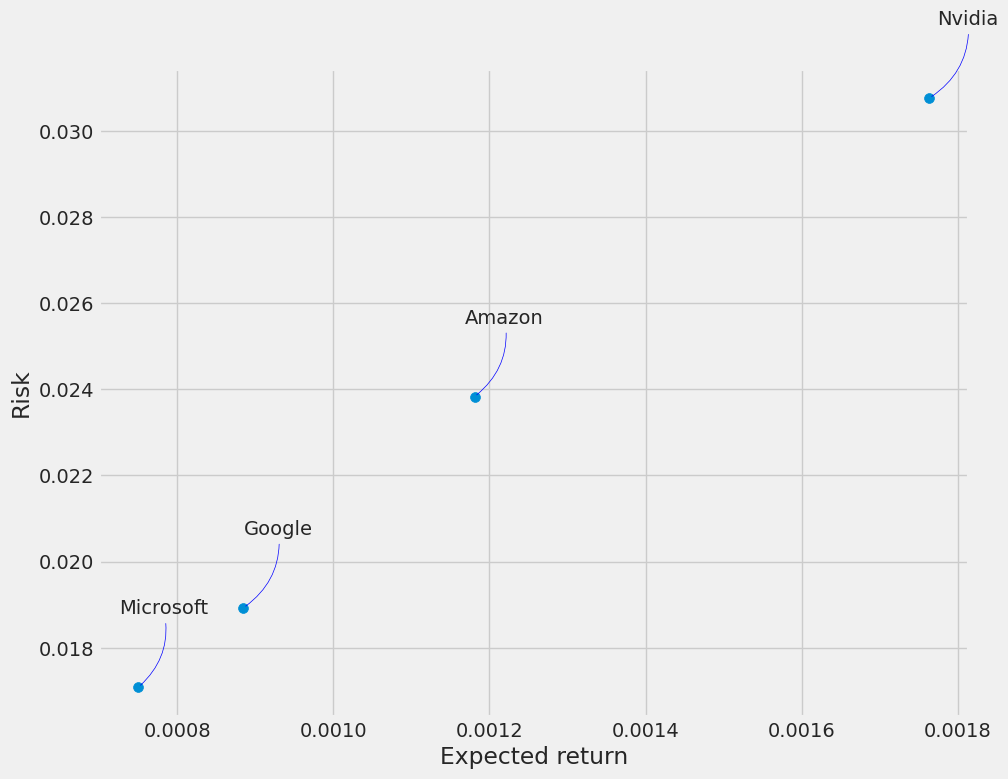

In [135]:
returns = returns_df.dropna()
returns.rename(columns={
    'Amazon_Daily Return':'Amazon',
    'Google_Daily Return':'Google',
    'Microsoft_Daily Return':'Microsoft',
    'Nvidia_Daily Return':'Nvidia'
    },
inplace=True)
area = np.pi * 16

plt.figure(figsize=(10, 8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Predicting the closing price stock price of Google inc:

In [137]:
google_df = companies_df_map['Google']
# Show the data
google_df

,Close,High,Low,Open,Volume,Company,Daily Return,MA @ 5 days,MA @ 10 days,MA @ 20 days,MA @ 50 days
Date,,,,,,,,,,,
2004-08-19,2.487352,2.579567,2.378775,2.478923,897427216,Google,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.684922,2.704009,2.491318,2.503960,458857488,Google,0.079430,NaN,NaN,NaN,NaN
2004-08-23,2.711942,2.813082,2.703266,2.745407,366857939,Google,0.010064,NaN,NaN,NaN,NaN
2004-08-24,2.599647,2.766478,2.567421,2.757554,306396159,Google,-0.041408,NaN,NaN,NaN,NaN
2004-08-25,2.627658,2.677237,2.575105,2.601877,184645512,Google,0.010775,2.622304,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,180.983810,184.879366,180.674166,183.590841,18734000,Google,-0.002148,184.258081,185.567589,191.688615,193.434028
2025-02-25,177.168152,180.554293,176.568844,179.949986,20832500,Google,-0.021083,182.573999,184.485822,190.869548,193.251037
2025-02-26,174.501190,177.877349,173.392453,176.743646,23637200,Google,-0.015053,180.090826,183.250227,189.752320,192.811337


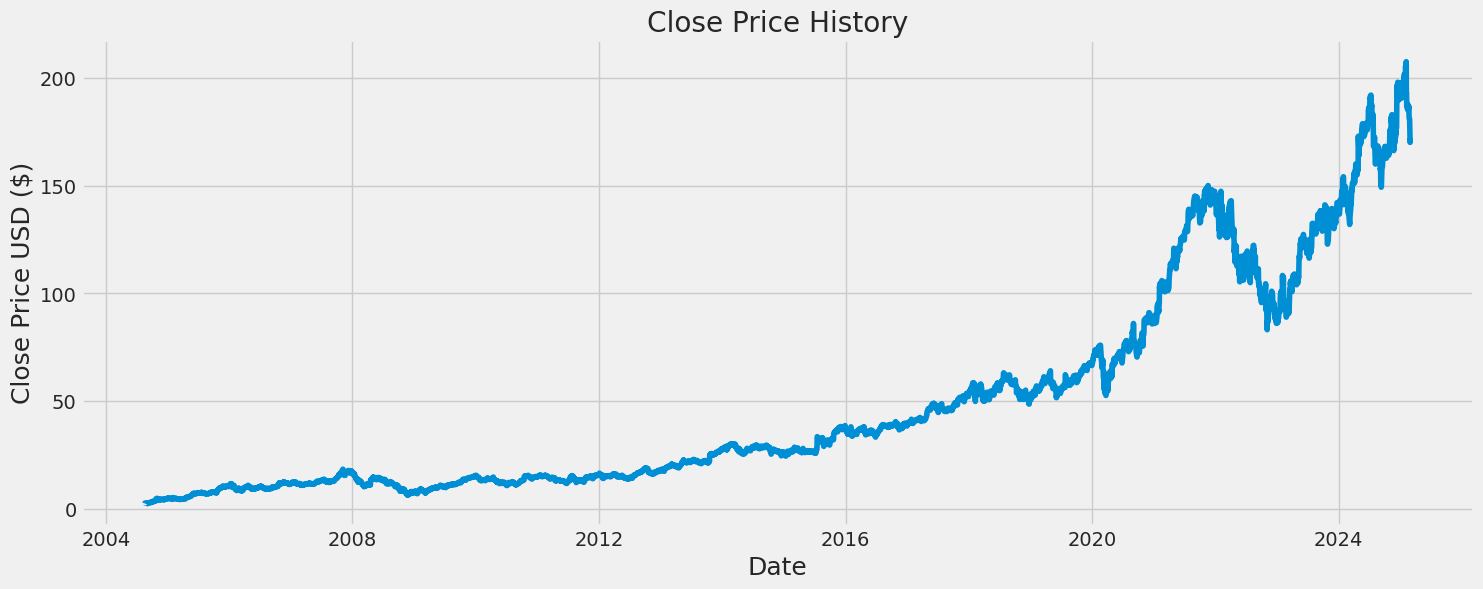

In [138]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(google_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
df = google_df[['Close']].copy()  # Just to avoid modifying the original data
df.index = pd.to_datetime(df.index)  # Ensure datetime format

# Generate a full range of business days
full_index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')  # 'B' = Business Days
df = df.reindex(full_index)  # Reindex to full business days
df = df.interpolate(method='time')  # Interpolate missing values based on time

In [210]:
full_index = pd.date_range(start=google_close_df.index.min(), end=google_close_df.index.max(), freq='B')

In [211]:
google_close_df = google_df[['Close']]

full_index = pd.date_range(start=google_close_df.index.min(), end=google_close_df.index.max(), freq='B')
google_close_df = google_close_df.reindex(full_index)  # Reindex to full business days
google_close_df = google_close_df.interpolate(method='time')  # Interpolate missing values based on time

train_df = google_close_df.iloc[:int(google_close_df.shape[0]*0.95)+1,:].copy()
test_df = google_close_df.iloc[int(google_close_df.shape[0]*0.95)+1:,:].copy()

In [212]:
train_df.tail()

,Close
2024-02-15,143.261444
2024-02-16,141.091721
2024-02-19,141.420166
2024-02-20,141.529648
2024-02-21,143.161911


In [213]:
test_df.head()
# USA stock market closed on 2024-02-19 due to George Washington's Birthday

,Close
2024-02-22,144.634964
2024-02-23,144.605072
2024-02-26,138.095917
2024-02-27,139.439560
2024-02-28,136.782135


In [214]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(train_df.values)

scaled_data

array([[5.39571526e-05],
       [1.35692427e-03],
       [1.53511999e-03],
       ...,
       [9.16310526e-01],
       [9.17032554e-01],
       [9.27797267e-01]])

In [215]:
train_df['scaled'] = pd.Series(list(scaled_data.flatten()), index=list(train_df.index))
train_df

,Close,scaled
2004-08-19,2.487352,0.000054
2004-08-20,2.684922,0.001357
2004-08-23,2.711942,0.001535
2004-08-24,2.599647,0.000795
2004-08-25,2.627658,0.000979
...,...,...
2024-02-15,143.261444,0.928454
2024-02-16,141.091721,0.914144
2024-02-19,141.420166,0.916311
2024-02-20,141.529648,0.917033


In [216]:
train_df['log_scaled'] = train_df['Close'].apply(lambda x : np.log(x))

In [217]:
train_df

,Close,scaled,log_scaled
2004-08-19,2.487352,0.000054,0.911219
2004-08-20,2.684922,0.001357,0.987652
2004-08-23,2.711942,0.001535,0.997665
2004-08-24,2.599647,0.000795,0.955376
2004-08-25,2.627658,0.000979,0.966093
...,...,...,...
2024-02-15,143.261444,0.928454,4.964671
2024-02-16,141.091721,0.914144,4.949410
2024-02-19,141.420166,0.916311,4.951735
2024-02-20,141.529648,0.917033,4.952509


In [218]:
# Perform same transformations on test data as well
test_df['scaled'] = test_df['Close'].apply(lambda x: scaler.transform([[x]])[0][0])
test_df['log_scaled'] = test_df['Close'].apply(lambda x : np.log(x))

In [219]:
test_df

,Close,scaled,log_scaled
2024-02-22,144.634964,0.937512,4.974213
2024-02-23,144.605072,0.937315,4.974006
2024-02-26,138.095917,0.894387,4.927948
2024-02-27,139.439560,0.903249,4.937631
2024-02-28,136.782135,0.885723,4.918389
...,...,...,...
2025-02-24,180.983810,1.177231,5.198408
2025-02-25,177.168152,1.152067,5.177099
2025-02-26,174.501190,1.134479,5.161932
2025-02-27,170.016312,1.104901,5.135894


### Models
+ For AR, MA and ARIMA we first need to plot PACF and ACF plots to find suitable orders for these models.
+ For neural sequence models, we can directly define our architecture and then do the training and prefictions.

In [191]:
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

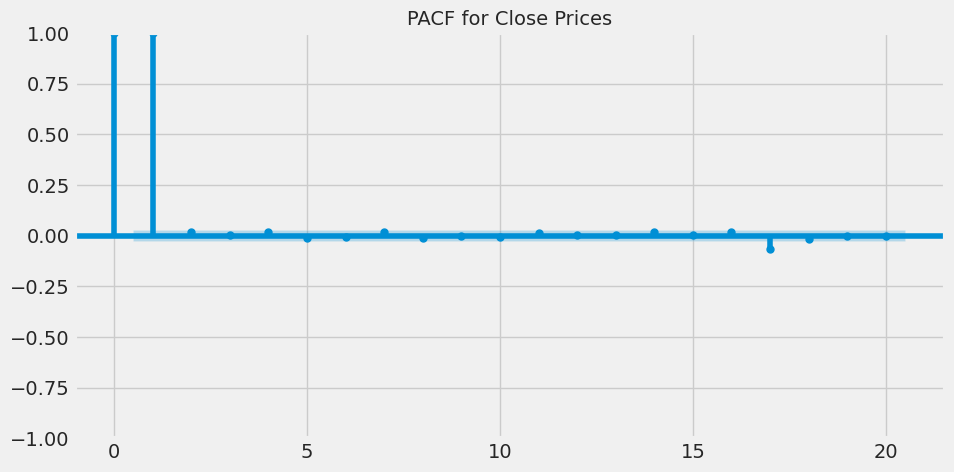

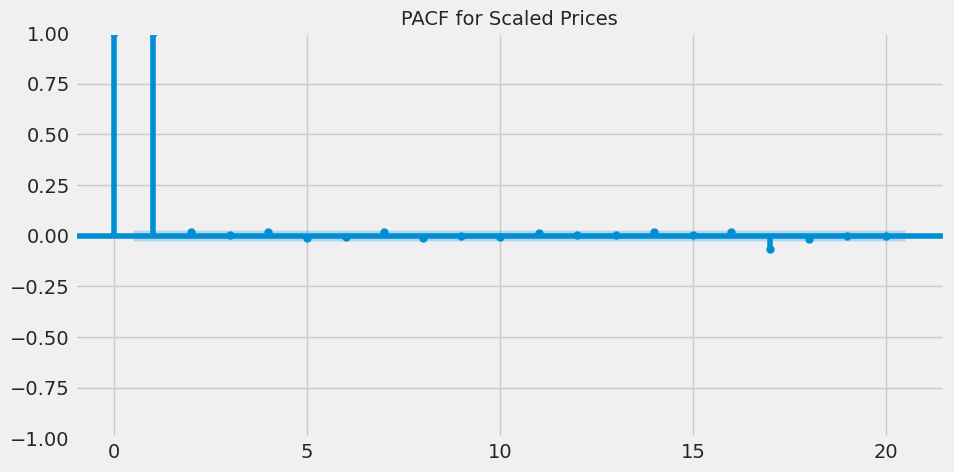

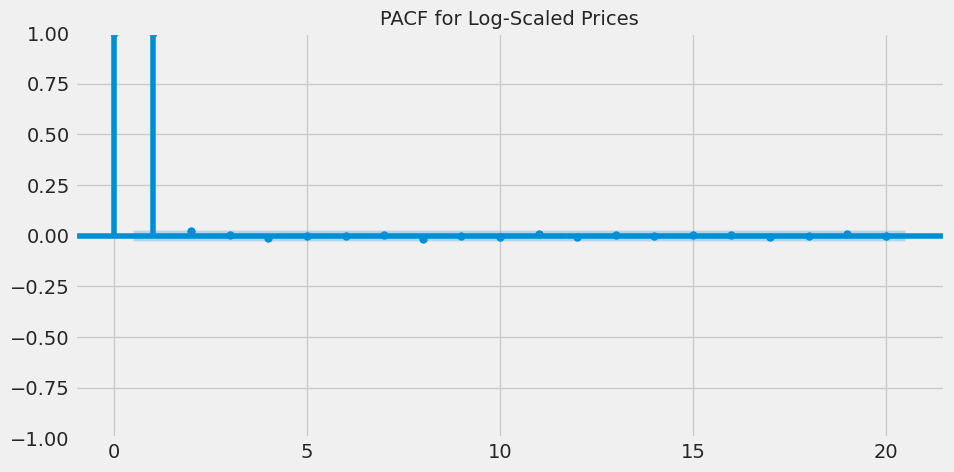

In [220]:
# for AR order
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(train_df['Close'], ax=ax, lags=20)
plt.title("PACF for Close Prices", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(train_df['scaled'], ax=ax, lags=20)
plt.title("PACF for Scaled Prices", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(train_df['log_scaled'], ax=ax, lags=20)
plt.title("PACF for Log-Scaled Prices", fontsize=14)
plt.show()

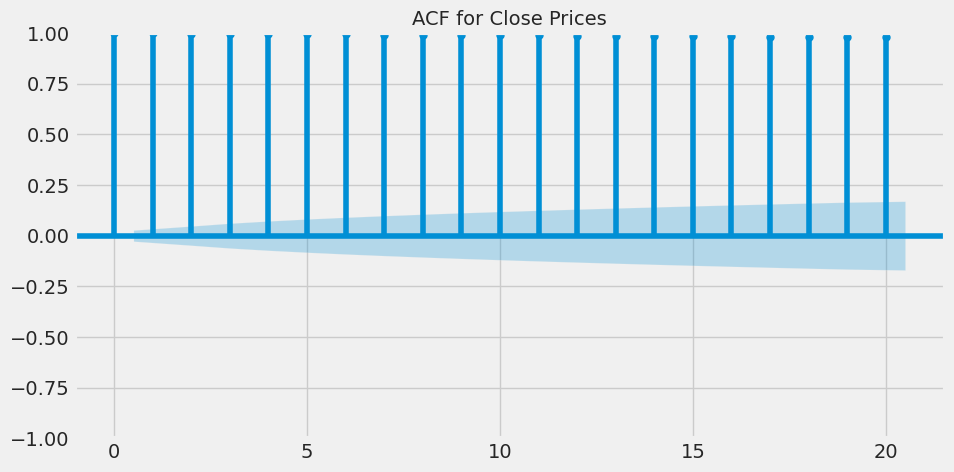

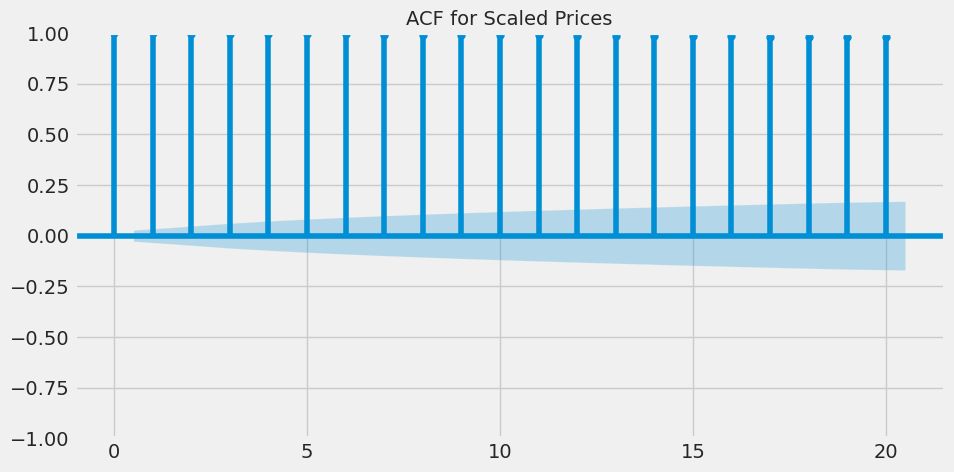

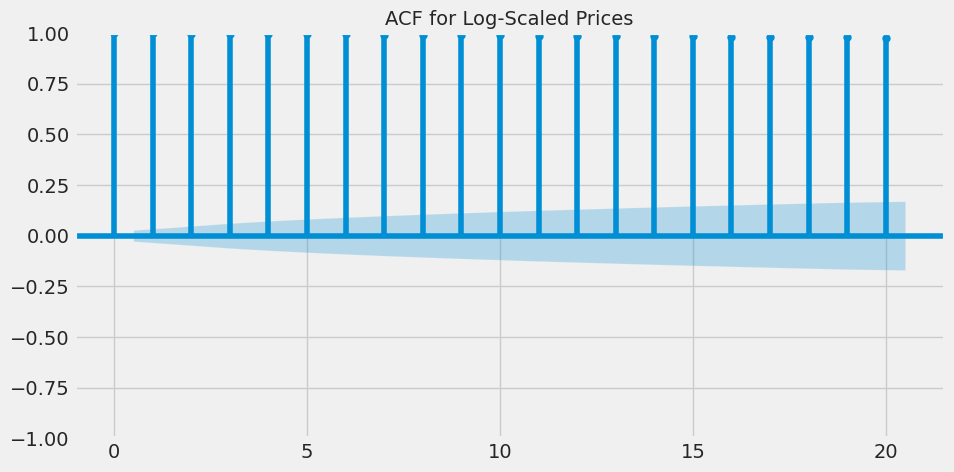

In [221]:
# for MA order
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(train_df['Close'], ax=ax, lags=20)
plt.title("ACF for Close Prices", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(train_df['scaled'], ax=ax, lags=20)
plt.title("ACF for Scaled Prices", fontsize=14)
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(train_df['log_scaled'], ax=ax, lags=20)
plt.title("ACF for Log-Scaled Prices", fontsize=14)
plt.show()

In [222]:
AR_model = ARIMA(train_df[['scaled']], order=(3, 0, 0))
start = time()
model_fit = AR_model.fit()
end = time()
print(f'Model trained in {round((end-start), 3)} sec')
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model trained in 13.972 sec
                               SARIMAX Results                                
Dep. Variable:                 scaled   No. Observations:                 5090
Model:                 ARIMA(3, 0, 0)   Log Likelihood               18091.345
Date:                Sat, 15 Mar 2025   AIC                         -36172.689
Time:                        08:16:39   BIC                         -36140.014
Sample:                    08-19-2004   HQIC                        -36161.247
                         - 02-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4103      0.121      3.394      0.001       0.173       0.647
ar.L1          0.9750      0.006    150.558      0.000       0.962       0.988
ar.L2          0.0143   

Only AR(1) coeff is significant, so we train a AR(1) model.

In [224]:
AR_model = ARIMA(train_df[['scaled']], order=(1, 0, 0), enforce_stationarity=False)
start = time()
AR_model_fit = AR_model.fit()
end = time()
print(f'Model trained in {round((end-start), 3)} sec')
print(AR_model_fit.summary())

Model trained in 1.598 sec
                               SARIMAX Results                                
Dep. Variable:                 scaled   No. Observations:                 5090
Model:                 ARIMA(1, 0, 0)   Log Likelihood               18090.983
Date:                Sat, 15 Mar 2025   AIC                         -36175.966
Time:                        08:17:23   BIC                         -36156.361
Sample:                    08-19-2004   HQIC                        -36169.101
                         - 02-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2633      1.087      0.242      0.809      -1.867       2.393
ar.L1          1.0002      0.000   2277.574      0.000       0.999       1.001
sigma2      4.784e-05   2

Text(0, 0.5, 'Close price')

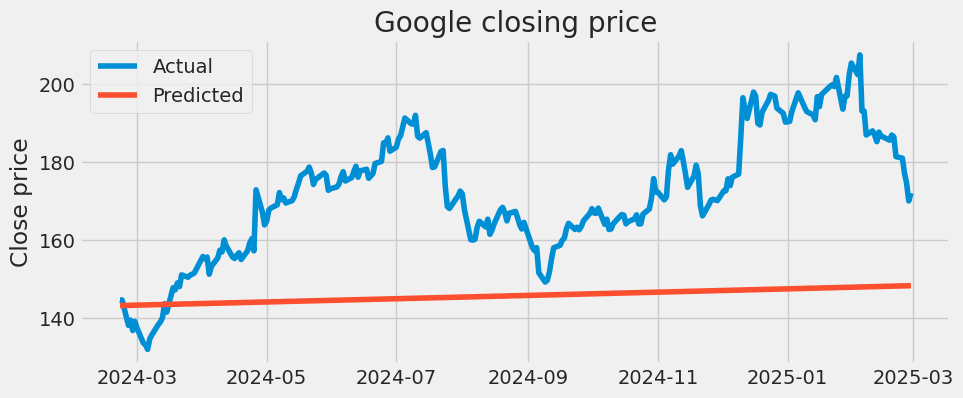

In [237]:
pred_start_date = test_df.index[0]
pred_end_date = test_df.index[-1]

preds = AR_model_fit.predict(start=pred_start_date, end=pred_end_date)

plt.figure(figsize=(10, 4))
plt.plot(test_df['Close'])
plt.plot(pd.Series(scaler.inverse_transform(preds.values.reshape(-1, 1)).flatten(), index=test_df.index))

plt.legend(('Actual', 'Predicted'))
plt.title('Google closing price')
plt.ylabel('Close price')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


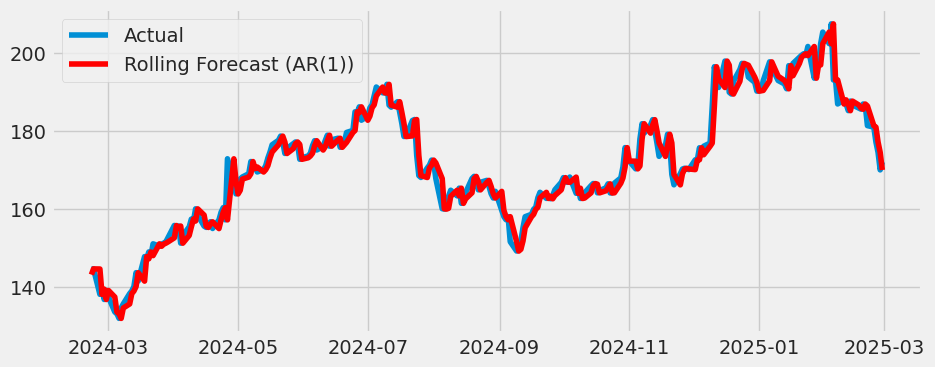

In [238]:
rolling_preds = []
history = list(train_df['Close'])  # Start with training data

for t in range(len(test_df)):
    model = ARIMA(history, order=(1, 0, 0))  # Fit AR(1)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]  # Predict one step ahead
    rolling_preds.append(yhat)  # Store prediction
    history.append(test_df['Close'].iloc[t])  # Append actual value

# Convert rolling_preds to a Series for plotting
rolling_preds = pd.Series(rolling_preds, index=test_df.index)

plt.figure(figsize=(10, 4))
plt.plot(test_df['Close'], label="Actual")
plt.plot(rolling_preds, label="Rolling Forecast (AR(1))", color="red")
plt.legend()
plt.show()


In [241]:
from sklearn.metrics import mean_squared_error

def rolling_rmse(actual, predicted):
    return np.sqrt(mean_squared_error(actual, predicted))
print('Rolling forecast RMSE for AR(1): ', round(rolling_rmse(test_df['Close'], rolling_preds), 3))


Rolling forecast RMSE for AR(1):  3.016


The ACF plot showed sharp correlations with previous lags (presence of a unit root), we will have to try an ARIMA model instead, we will try introducing differencing (d > 0).

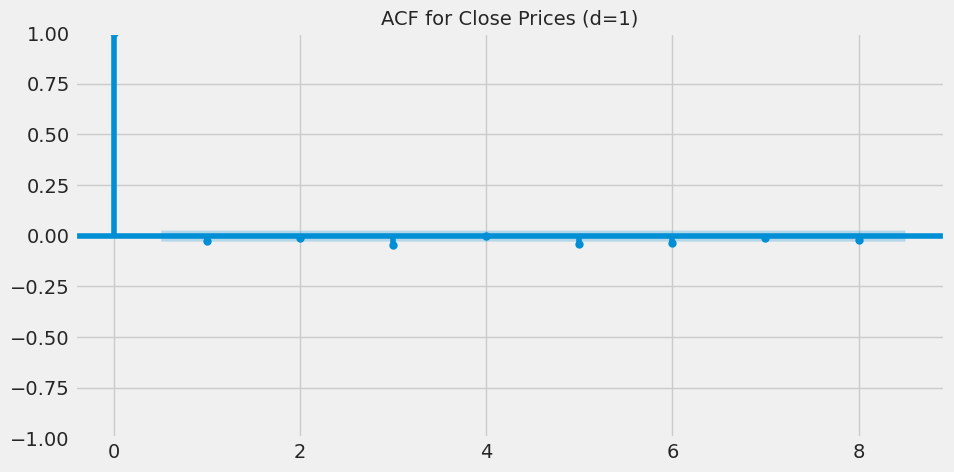

In [247]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(train_df['Close'].diff().dropna(), ax=ax, lags=8)
plt.title("ACF for Close Prices (d=1)", fontsize=14)
plt.show()

In [251]:
MA_model = ARIMA(train_df[['scaled']], order=(0, 1, 2), enforce_stationarity=False)
start = time()
MA_model_fit = MA_model.fit()
end = time()
print(f'Model trained in {round((end-start), 3)} sec')
print(MA_model_fit.summary())

Model trained in 1.004 sec
                               SARIMAX Results                                
Dep. Variable:                 scaled   No. Observations:                 5090
Model:                 ARIMA(0, 1, 2)   Log Likelihood               18080.559
Date:                Sat, 15 Mar 2025   AIC                         -36155.117
Time:                        09:45:36   BIC                         -36135.515
Sample:                    08-19-2004   HQIC                        -36148.253
                         - 02-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0246      0.006     -3.824      0.000      -0.037      -0.012
ma.L2         -0.0133      0.007     -1.915      0.055      -0.027       0.000
sigma2       4.78e-05   2

Text(0, 0.5, 'Close price')

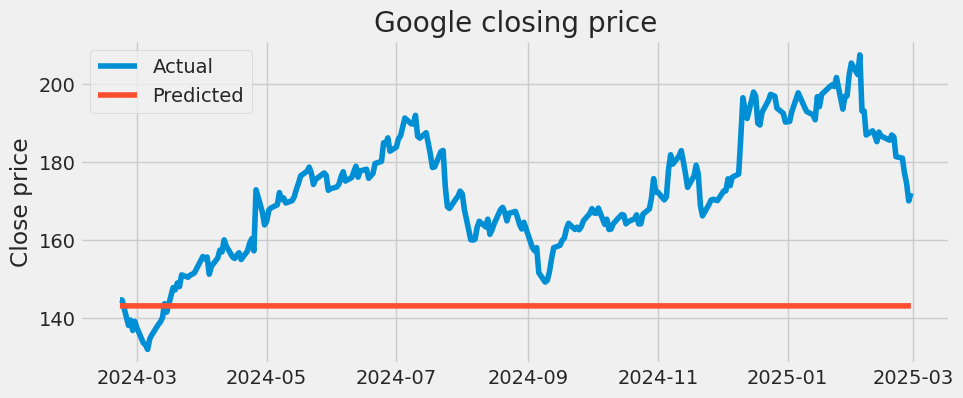

In [252]:
pred_start_date = test_df.index[0]
pred_end_date = test_df.index[-1]

preds = MA_model_fit.predict(start=pred_start_date, end=pred_end_date)

plt.figure(figsize=(10, 4))
plt.plot(test_df['Close'])
plt.plot(pd.Series(scaler.inverse_transform(preds.values.reshape(-1, 1)).flatten(), index=test_df.index))

plt.legend(('Actual', 'Predicted'))
plt.title('Google closing price')
plt.ylabel('Close price')

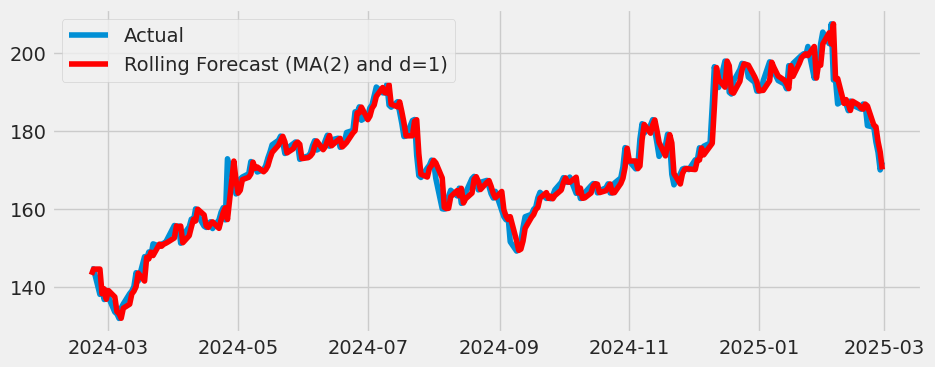

In [253]:
rolling_preds_ma = []
history = list(train_df['Close'])  # Start with training data

for t in range(len(test_df)):
    model = ARIMA(history, order=(0, 1, 2))  # Fit AR(1)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]  # Predict one step ahead
    rolling_preds_ma.append(yhat)  # Store prediction
    history.append(test_df['Close'].iloc[t])  # Append actual value

# Convert rolling_preds to a Series for plotting
rolling_preds_ma = pd.Series(rolling_preds_ma, index=test_df.index)

plt.figure(figsize=(10, 4))
plt.plot(test_df['Close'], label="Actual")
plt.plot(rolling_preds_ma, label="Rolling Forecast (MA(2) and d=1)", color="red")
plt.legend()
plt.show()


In [254]:
print('Rolling forecast RMSE for MA(2) and d=1: ', round(rolling_rmse(test_df['Close'], rolling_preds_ma), 3))

Rolling forecast RMSE for MA(2) and d=1:  3.022


Now trying ARIMA(1,1,2) model

Model trained in 0.901 sec
                               SARIMAX Results                                
Dep. Variable:                 scaled   No. Observations:                 5090
Model:                 ARIMA(1, 1, 2)   Log Likelihood               18081.632
Date:                Sat, 15 Mar 2025   AIC                         -36155.265
Time:                        10:01:33   BIC                         -36129.128
Sample:                    08-19-2004   HQIC                        -36146.112
                         - 02-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3139      0.409      0.768      0.443      -0.488       1.116
ma.L1         -0.3386      0.409     -0.828      0.407      -1.140       0.463
ma.L2         -0.0056    

Text(0, 0.5, 'Close price')

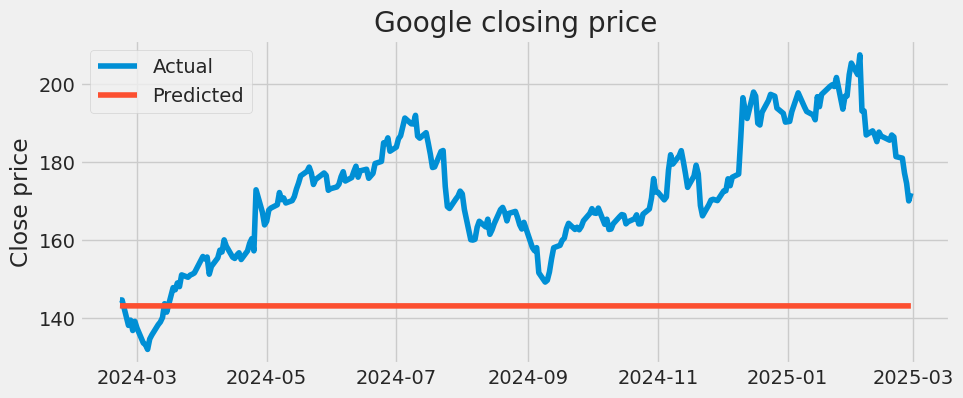

In [259]:
ARIMA_model = ARIMA(train_df[['scaled']], order=(1, 1, 2), enforce_stationarity=False)
start = time()
ARIMA_model_fit = ARIMA_model.fit()
end = time()
print(f'Model trained in {round((end-start), 3)} sec')
print(ARIMA_model_fit.summary())

pred_start_date = test_df.index[0]
pred_end_date = test_df.index[-1]

preds = ARIMA_model_fit.predict(start=pred_start_date, end=pred_end_date)

plt.figure(figsize=(10, 4))
plt.plot(test_df['Close'])
plt.plot(pd.Series(scaler.inverse_transform(preds.values.reshape(-1, 1)).flatten(), index=test_df.index))

plt.legend(('Actual', 'Predicted'))
plt.title('Google closing price')
plt.ylabel('Close price')

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model trained in 2.061 sec
                               SARIMAX Results                                
Dep. Variable:                 scaled   No. Observations:                 5090
Model:                 ARIMA(3, 1, 3)   Log Likelihood               18081.218
Date:                Sat, 15 Mar 2025   AIC                         -36148.436
Time:                        10:03:23   BIC                         -36102.697
Sample:                    08-19-2004   HQIC                        -36132.419
                         - 02-21-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3898      0.167      2.334      0.020       0.062       0.717
ar.L2          0.7222      0.055     13.046      0.000       0.614       0.831
ar.L3         -0.4754    

Text(0, 0.5, 'Close price')

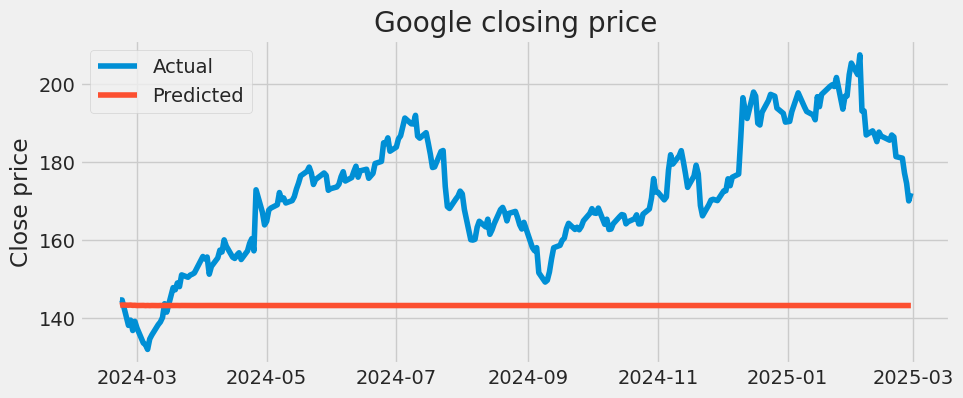

In [260]:
ARIMA_model = ARIMA(train_df[['scaled']], order=(3, 1, 3), enforce_stationarity=False)
start = time()
ARIMA_model_fit = ARIMA_model.fit()
end = time()
print(f'Model trained in {round((end-start), 3)} sec')
print(ARIMA_model_fit.summary())

pred_start_date = test_df.index[0]
pred_end_date = test_df.index[-1]

preds = ARIMA_model_fit.predict(start=pred_start_date, end=pred_end_date)

plt.figure(figsize=(10, 4))
plt.plot(test_df['Close'])
plt.plot(pd.Series(scaler.inverse_transform(preds.values.reshape(-1, 1)).flatten(), index=test_df.index))

plt.legend(('Actual', 'Predicted'))
plt.title('Google closing price')
plt.ylabel('Close price')

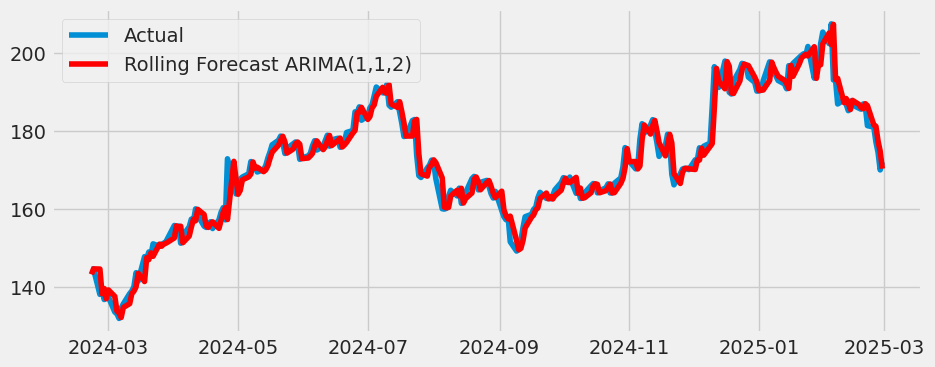

In [261]:
rolling_preds_arima = []
history = list(train_df['Close'])  # Start with training data

for t in range(len(test_df)):
    model = ARIMA(history, order=(1, 1, 2))  # Fit AR(1)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]  # Predict one step ahead
    rolling_preds_arima.append(yhat)  # Store prediction
    history.append(test_df['Close'].iloc[t])  # Append actual value

# Convert rolling_preds to a Series for plotting
rolling_preds_arima = pd.Series(rolling_preds_arima, index=test_df.index)

plt.figure(figsize=(10, 4))
plt.plot(test_df['Close'], label="Actual")
plt.plot(rolling_preds_arima, label="Rolling Forecast ARIMA(1,1,2)", color="red")
plt.legend()
plt.show()


In [262]:
print('Rolling forecast RMSE for ARIMA(1,1,2): ', round(rolling_rmse(test_df['Close'], rolling_preds_arima), 3))

Rolling forecast RMSE for ARIMA(1,1,2):  3.025


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

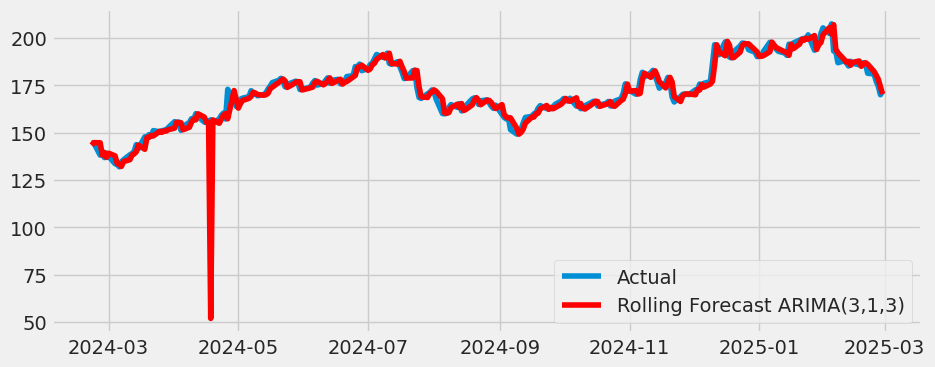

In [263]:
rolling_preds_arima = []
history = list(train_df['Close'])  # Start with training data

for t in range(len(test_df)):
    model = ARIMA(history, order=(3, 1, 3))  # Fit AR(1)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]  # Predict one step ahead
    rolling_preds_arima.append(yhat)  # Store prediction
    history.append(test_df['Close'].iloc[t])  # Append actual value

# Convert rolling_preds to a Series for plotting
rolling_preds_arima = pd.Series(rolling_preds_arima, index=test_df.index)

plt.figure(figsize=(10, 4))
plt.plot(test_df['Close'], label="Actual")
plt.plot(rolling_preds_arima, label="Rolling Forecast ARIMA(3,1,3)", color="red")
plt.legend()
plt.show()

In [264]:
print('Rolling forecast RMSE for ARIMA(3,1,3): ', round(rolling_rmse(test_df['Close'], rolling_preds_arima), 3))

Rolling forecast RMSE for ARIMA(3,1,3):  7.088


In [266]:
train_df.to_pickle('train_df.pickle')
test_df.to_pickle('test_df.pickle')

In [271]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

Now, let us try neural sequence models, LSTM models.

In [6]:
import pickle
train_df, test_df, scaler = pd.read_pickle('/content/train_df.pickle'), pd.read_pickle('/content/test_df.pickle'), pickle.load(open('/content/scaler.pkl', 'rb'))

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

train_size = len(train_df)

# Function to create sequences
def create_sequences(data, seq_length):
    sequences, targets = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

# Define sequence length
SEQ_LENGTH = 32  # Use past 32 days for prediction

# Prepare training and testing sequences
X_train, y_train = create_sequences(train_df[['scaled']].values, SEQ_LENGTH)
X_test, y_test = create_sequences(test_df[['scaled']].values, SEQ_LENGTH)

# Convert to PyTorch tensors
X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

# PyTorch Dataset class
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create DataLoaders
BATCH_SIZE = 64
train_loader = DataLoader(TimeSeriesDataset(X_train, y_train), batch_size=BATCH_SIZE, shuffle=False, drop_last=True)
test_loader = DataLoader(TimeSeriesDataset(X_test, y_test), batch_size=1, shuffle=False)

In [41]:
# Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=256, num_layers=3, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=0.4)
        self.layer_norm = nn.LayerNorm(hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))  # LSTM output: (batch, seq_len, hidden_size)
        out = self.layer_norm(out)  # Normalize hidden states
        return self.fc(out[:, -1, :])  # Get last time step's prediction

# Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Train the model
EPOCHS = 45
train_loss = []
for epoch in range(EPOCHS):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_loss.append(epoch_loss/len(train_loader))
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss/len(train_loader):.6f}')

Epoch 1/45, Loss: 0.019914
Epoch 2/45, Loss: 0.034691
Epoch 3/45, Loss: 0.035120
Epoch 4/45, Loss: 0.047812
Epoch 5/45, Loss: 0.055164
Epoch 6/45, Loss: 0.057517
Epoch 7/45, Loss: 0.062583
Epoch 8/45, Loss: 0.070251
Epoch 9/45, Loss: 0.070084
Epoch 10/45, Loss: 0.064637
Epoch 11/45, Loss: 0.088696
Epoch 12/45, Loss: 0.047631
Epoch 13/45, Loss: 0.081699
Epoch 14/45, Loss: 0.078777
Epoch 15/45, Loss: 0.076581
Epoch 16/45, Loss: 0.073096
Epoch 17/45, Loss: 0.066963
Epoch 18/45, Loss: 0.056840
Epoch 19/45, Loss: 0.040410
Epoch 20/45, Loss: 0.020549
Epoch 21/45, Loss: 0.007371
Epoch 22/45, Loss: 0.005505
Epoch 23/45, Loss: 0.005031
Epoch 24/45, Loss: 0.004397
Epoch 25/45, Loss: 0.003875
Epoch 26/45, Loss: 0.003383
Epoch 27/45, Loss: 0.003239
Epoch 28/45, Loss: 0.002896
Epoch 29/45, Loss: 0.002623
Epoch 30/45, Loss: 0.002312
Epoch 31/45, Loss: 0.002053
Epoch 32/45, Loss: 0.001756
Epoch 33/45, Loss: 0.001407
Epoch 34/45, Loss: 0.001208
Epoch 35/45, Loss: 0.000935
Epoch 36/45, Loss: 0.000742
E

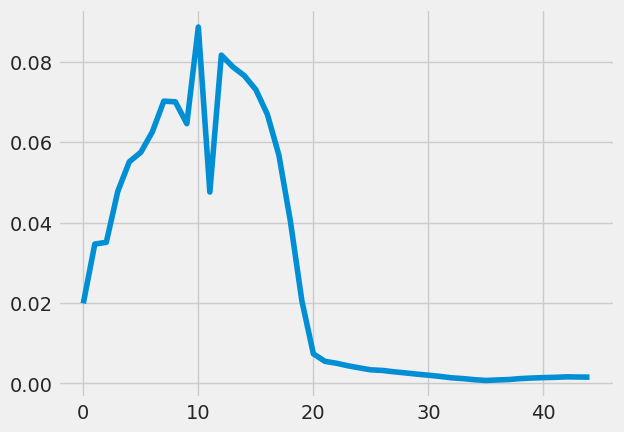

In [42]:
plt.plot(train_loss)

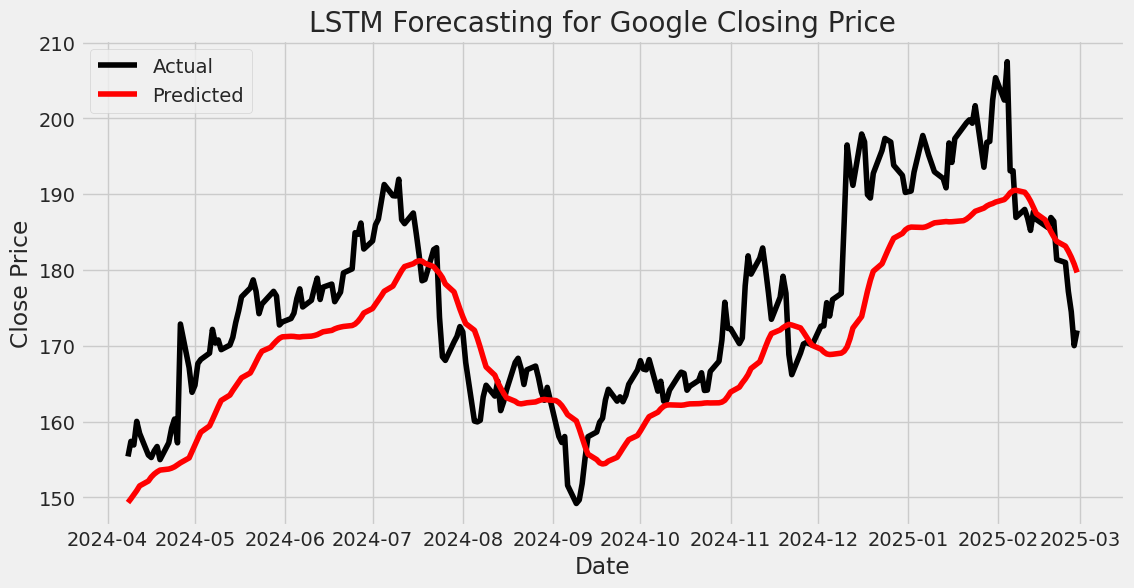

Test RMSE: 8.3680


In [43]:
# Evaluate model and make predictions
model.eval()
preds = []
actuals = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        pred = model(X_batch).cpu().numpy()
        preds.append(pred)
        actuals.append(y_batch.numpy())

preds = np.array(preds).reshape(-1, 1)
actuals = np.array(actuals).reshape(-1, 1)

# Inverse transform the predictions
preds = scaler.inverse_transform(preds)
actuals = scaler.inverse_transform(actuals)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(test_df.index[SEQ_LENGTH:], actuals, label="Actual", color="black")
plt.plot(test_df.index[SEQ_LENGTH:], preds, label="Predicted", color="red")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.title("LSTM Forecasting for Google Closing Price")
plt.show()

# Calculate RMSE
rmse = np.sqrt(np.mean((actuals - preds) ** 2))
print(f"Test RMSE: {rmse:.4f}")

Thus using LSTM we got an acceptable RMSE of **8.3680**